# clase 1-04

Clase de respaso, muestra de otros cuadernos de los compañeros sobre un tp 

# Clase 8-04

## Temario

- Agrupamiento de pixeles- downsampling. Muestreo espacial

- Análisis por canales de colores

- Cuantización

- Ver perspectivas desde cada color matricialmente

## Instalación e importación de librerías

In [1]:
!pip install opencv-python

!apt-get update && apt-get install -y libgl1-mesa-glx -q
!apt-get install -y libglib2.0-0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 35.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [27.2 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 http://deb.debian.org/debian bullseye/main amd64 Packages [8,066 kB]
Get:5 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [362 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [18.8 kB]
Fetched 8,633 kB in 2s (5,501 kB/s)

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libllvm11 lib

In [2]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

### Funciones Auxiliares

In [3]:
def data_img(img):
  print('Tamaño = ',img.shape)
  print('Max  = ',np.max(img))
  print('Min  = ',np.min(img))

def mostrar_imagen(X, gama='gray', axis=None):
    plt.figure(figsize=(7,7))
    plt.imshow(X, cmap=gama)
    if not axis is None:
        plt.axis(axis)
    plt.show()

def comparar_con_imagen_original(img_original, img_nueva,titulo_nueva, titulo_img_original="Imagen Original"):
    plt.figure(figsize=(14, 7))  # Increased figure width to accommodate two images
    plt.subplot(1, 2, 1)
    plt.imshow(img_original, cmap='gray')   
    plt.title(titulo_img_original)
    plt.axis('off')
    data_img(img_original)

    # Display the processed image (Y) on the right
    plt.subplot(1, 2, 2)
    plt.imshow(img_nueva, cmap='gray')
    plt.title(titulo_nueva)
    plt.axis('off')
    data_img(img_nueva)

    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()

def undersample(img, d):
    """Reduces the resolution of an image by a factor d"""
    # toma cada d-ésimo píxel en filas y columnas, reduciendo la cantidad de datos. 
    return img[::d,::d]

def ScaleGray(img, grises):
    d = int(256/grises)
    return (img // d ) *d

## Descargar imagen

Se puede reemplazar por cualquier imagen que este en escala de grises

In [4]:
# !wget https://www.dropbox.com/s/dbwjqs0mfo5hgw6/mandril.png

Tamaño =  (512, 512, 3)
Max  =  255
Min  =  0


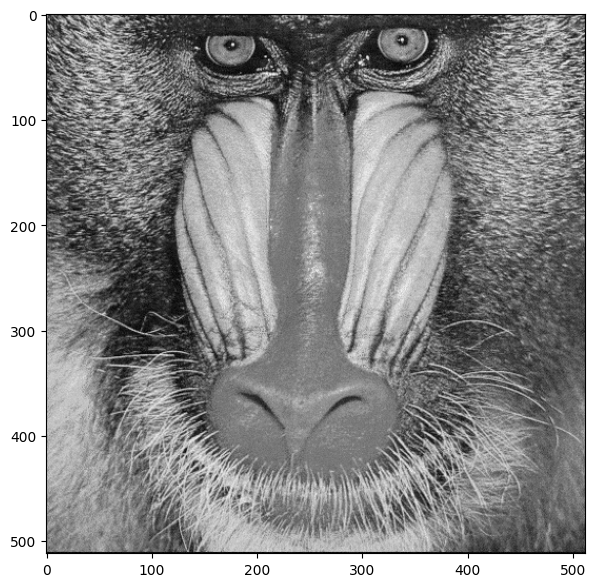

In [5]:
img_example = 'mandril.png'
img = imread(img_example)
data_img(img)
mostrar_imagen(img, gama='gray')

### Selección de un canal

La imagen original esta en escala de grises, por lo tanto no es necesaria la selección de un canal en especifico.

Como resultado quedará una imagen de dos dimensiones

In [6]:
img_grises = img[:,:,0]
print(img_grises.shape)

(512, 512)


## Downsampling de la imagen

Se refiere al proceso de reducir su resolución espacial, lo que significa disminuir el número de píxeles en la imagen. En este caso lo que se va  a reducir es la cantidad de "gamas" de las escalas de grises, de 256, dando como resultado una imagen con menos detalles

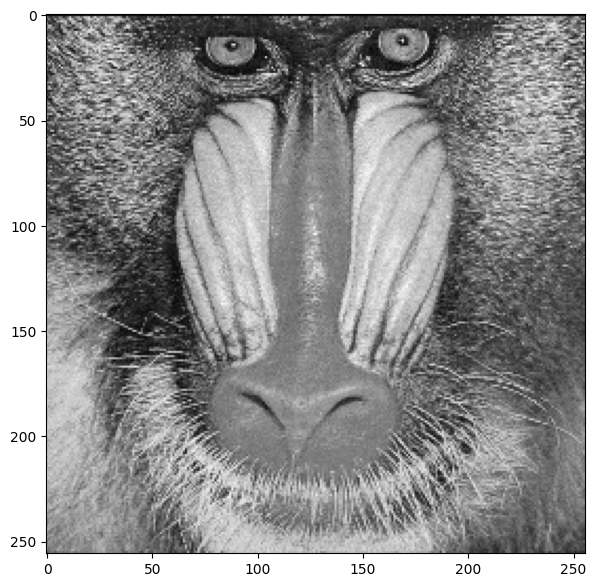

In [7]:
d = 2 # toma cada d-ésimo píxel en filas y columnas, reduciendo la cantidad de datos.
img_undersampled = undersample(img_grises, d)
mostrar_imagen(img_undersampled, gama='gray')

## Cuantización

In [8]:
def cuantizacion_imagen(X, q):
    (Nx,Mx) = X.shape # guarda las dimensiones de la imagen
    Ny = Nx # en procesameiento de imagenes se encuentra al reves
    My = Mx
    Y = np.zeros((Ny,My),np.uint8)
    for i in range(Ny):
      for j in range(My):
        x = int(np.fix(X[i,j]/q)*q)
        Y[i,j] = x
    print('This image has = ',int(256/q),' grayvalues')
    return Y


This image has =  8  grayvalues


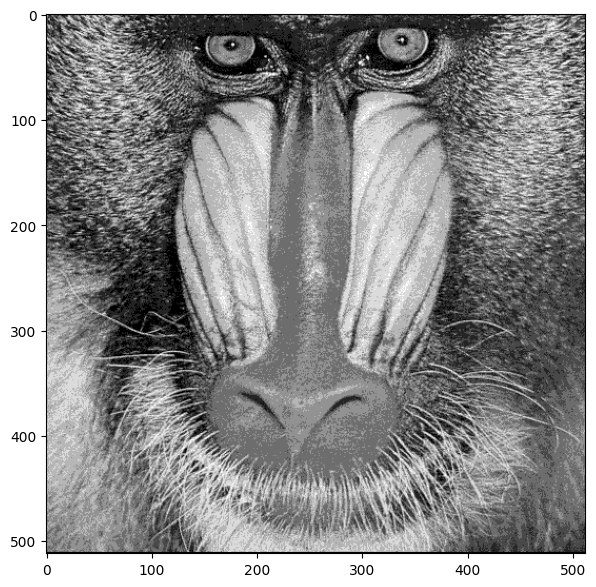

In [9]:
imagen_cuantizada_q_32 = cuantizacion_imagen(img_grises, q=32)
mostrar_imagen(imagen_cuantizada_q_32, gama='gray')

This image has =  2  grayvalues


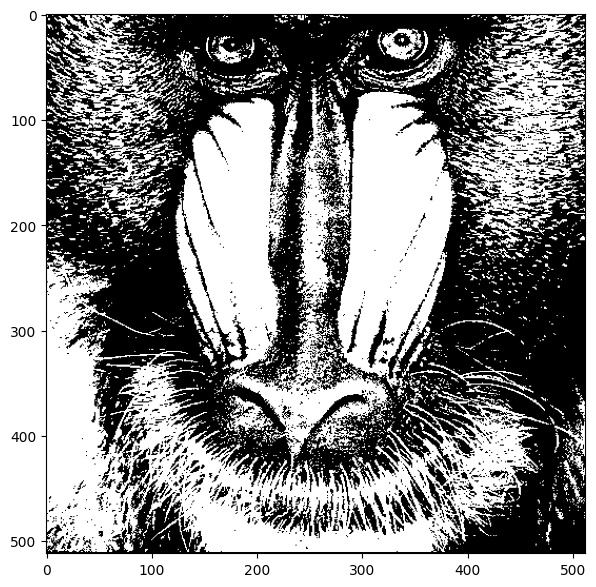

In [10]:
imagen_cuantizada_q_128 = cuantizacion_imagen(img_grises, q=128)
mostrar_imagen(imagen_cuantizada_q_128, gama='gray')

Tamaño =  (512, 512)
Max  =  255
Min  =  0
Tamaño =  (512, 512)
Max  =  224
Min  =  0


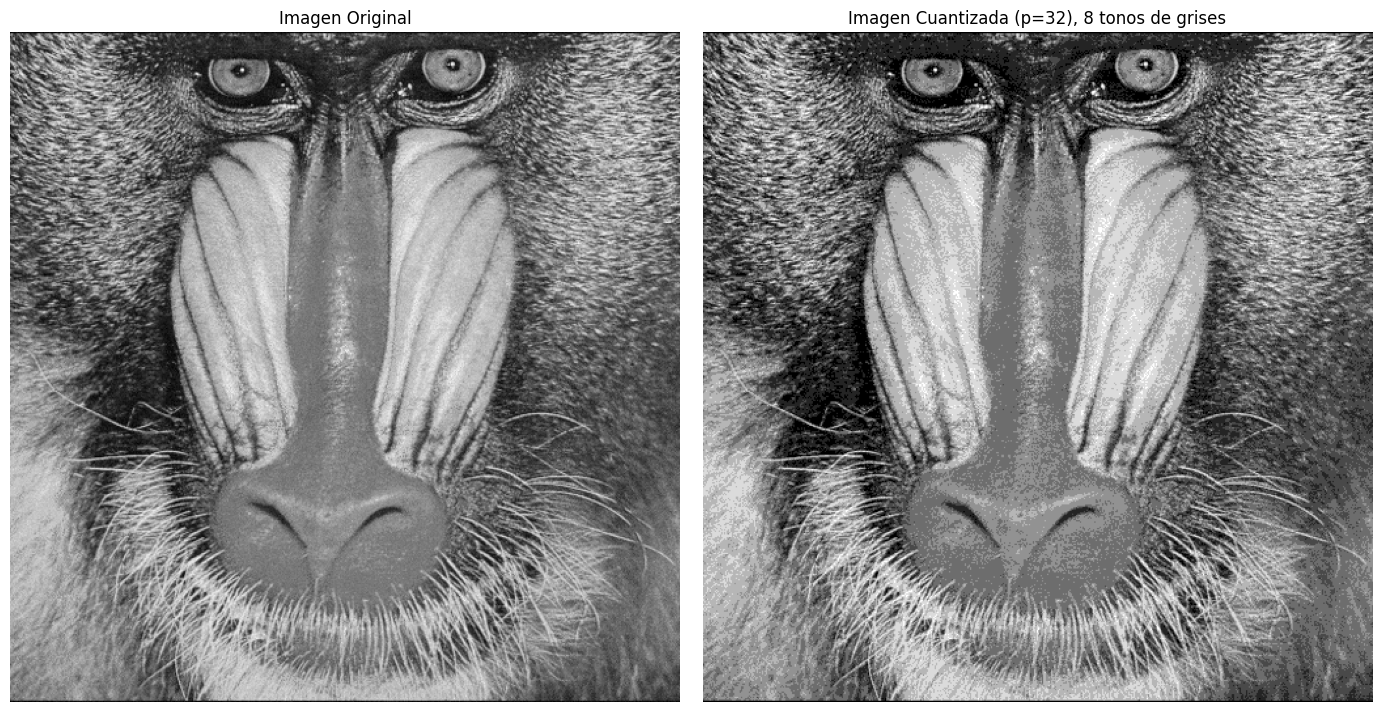

In [11]:
comparar_con_imagen_original(
    img_grises,
    imagen_cuantizada_q_32,
    f'Imagen Cuantizada (p=32), 8 tonos de grises')

Tamaño =  (512, 512)
Max  =  255
Min  =  0
Tamaño =  (512, 512)
Max  =  128
Min  =  0


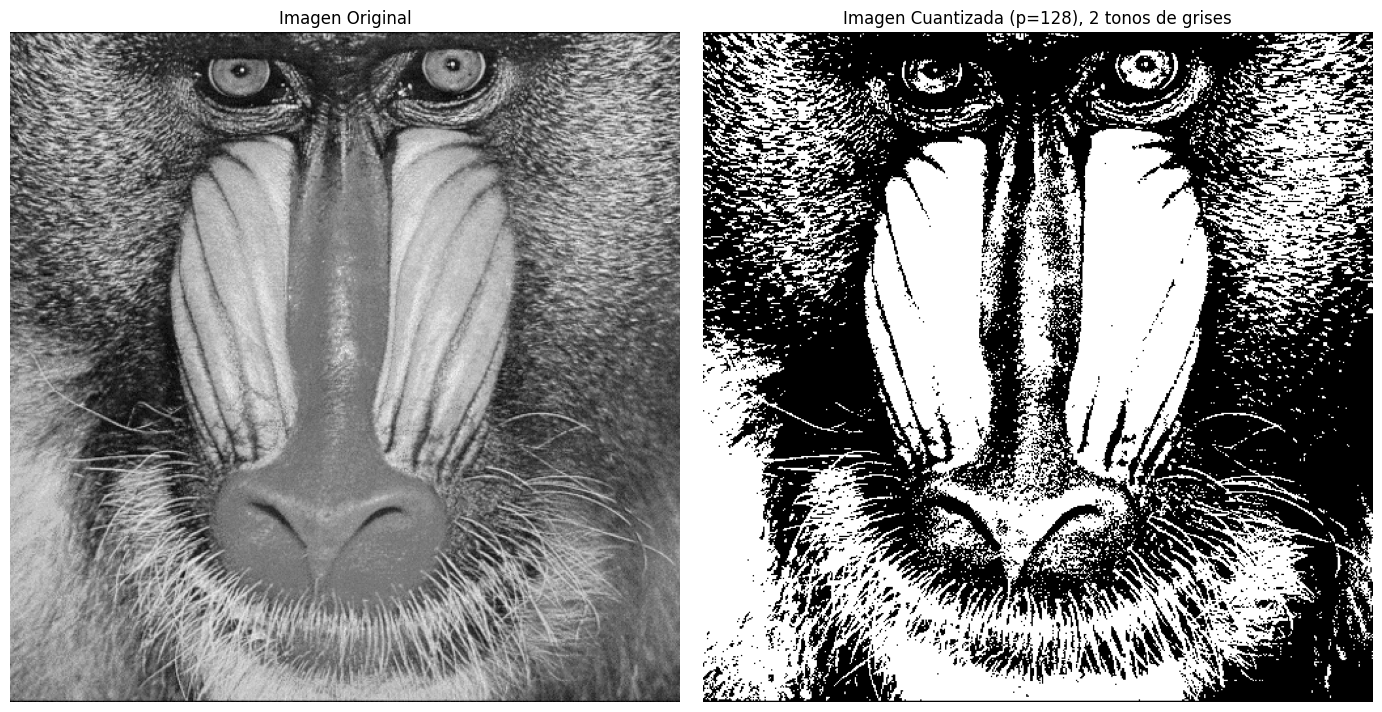

In [12]:
comparar_con_imagen_original(
    img_grises,
    imagen_cuantizada_q_128,
    f'Imagen Cuantizada (p=128), 2 tonos de grises')

Se puede apreciar la perdida de tonos de grises

## Histograma

In [13]:
def imhist(img):
    h = np.zeros(256)           # Vector para contar ocurrencias
    for i in range(img.shape[0]):    # Para cada fila
        for j in range(img.shape[1]): # Para cada columna
            h[img[i,j]] += 1         # Incrementa contador del valor
    return h

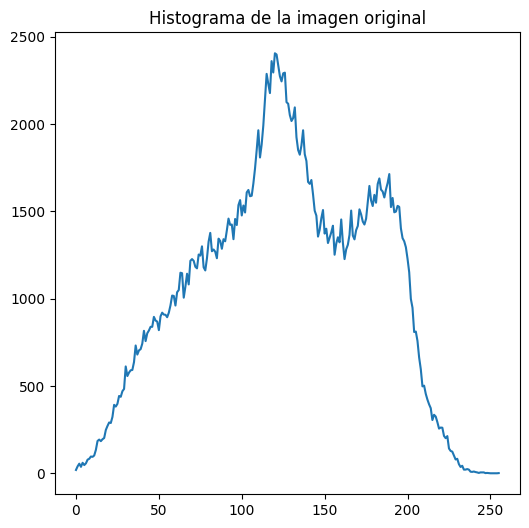

In [14]:
h = imhist(img_grises)
plt.figure(figsize=(6,6))
plt.title('Histograma de la imagen original')
plt.plot(h)
plt.show()


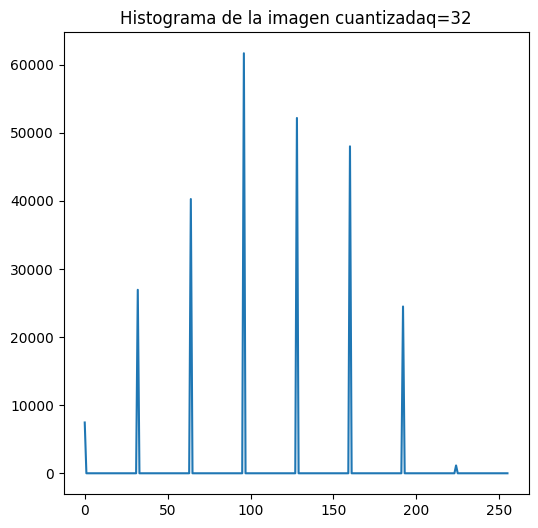

In [15]:
h = imhist(imagen_cuantizada_q_32)
plt.figure(figsize=(6,6))
plt.title('Histograma de la imagen cuantizadaq=32')
plt.plot(h)
plt.show()


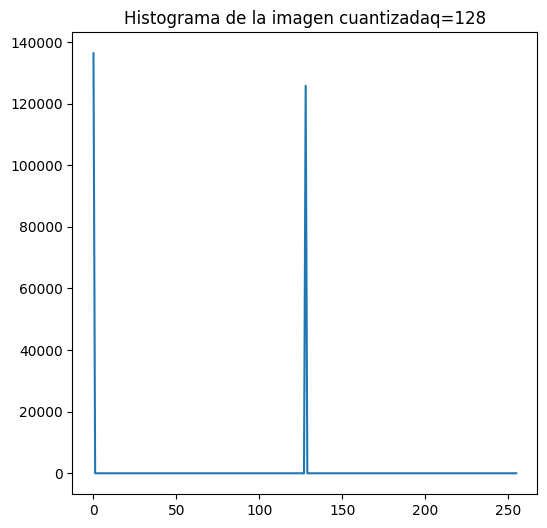

In [16]:
h = imhist(imagen_cuantizada_q_128)
plt.figure(figsize=(6,6))
plt.title('Histograma de la imagen cuantizadaq=128')
plt.plot(h)
plt.show()


## Probar con otra imagen 

In [17]:
# !wget https://www.dropbox.com/s/vjxcddg5rgap35i/scale.png

In [18]:
img_scale_filename = 'scale.png'
img_scale = imread(img_scale_filename)
data_img(img_scale)

Tamaño =  (512, 512, 3)
Max  =  255
Min  =  0


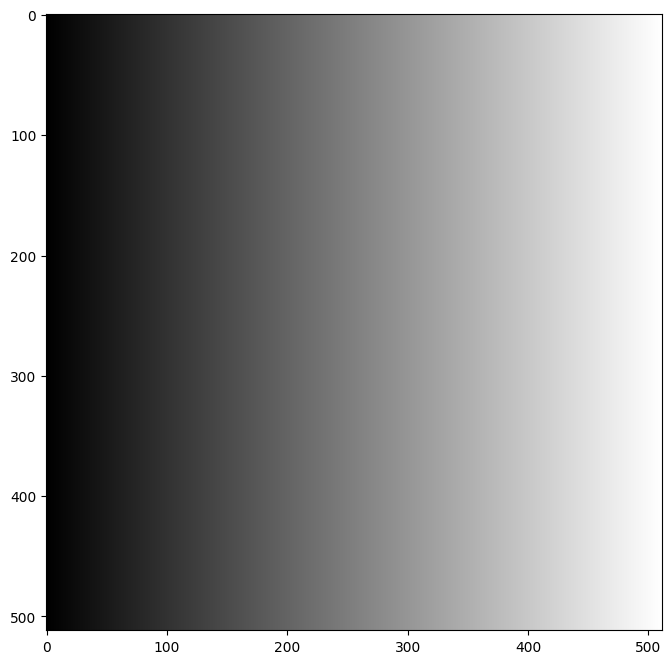

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(img_scale)

In [20]:
img_scale_grises = img_scale[:,:,0]
data_img(img_scale_grises)

Tamaño =  (512, 512)
Max  =  255
Min  =  0


This image has =  4  grayvalues
Tamaño =  (512, 512)
Max  =  255
Min  =  0
Tamaño =  (512, 512)
Max  =  192
Min  =  0


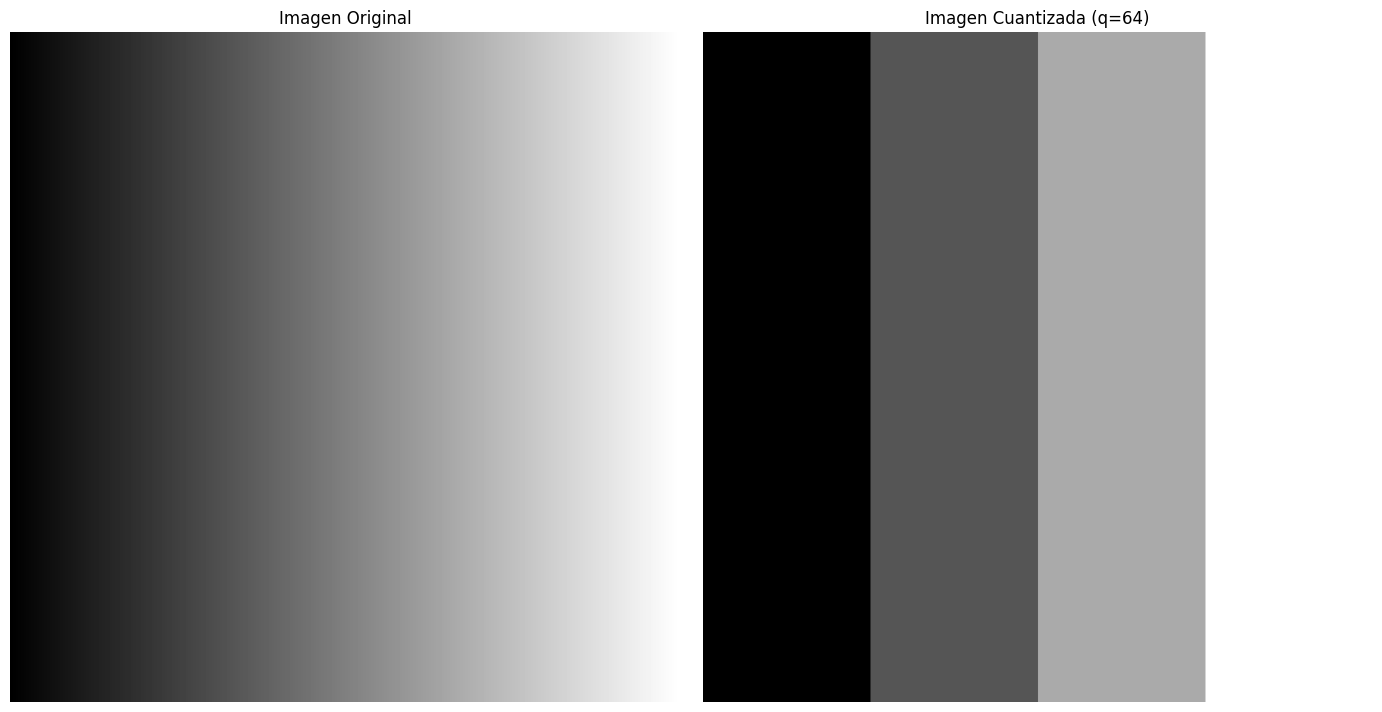

In [21]:
img_cuatizada_q_64 = cuantizacion_imagen(img_scale_grises, q=64)
comparar_con_imagen_original(img_scale_grises, img_cuatizada_q_64, 'Imagen Cuantizada (q=64)')

# 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f21290ec-5662-479b-bebe-2e01fe07d4a5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>